In [4]:
import pandas as pd

판다스는 URL에서 직접 데이터를 가져올 수 있다.

In [7]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv( URL, names=['sepal_length', 'sepal_width', 'petal_length','petal_width','class'])

In [8]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [9]:
print (df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [10]:
df.loc[df['sepal_length'] >7.0,]

,sepal_length,sepal_width,petal_length,petal_width,class
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


점차트 데이터 시각화

In [16]:
import matplotlib.pyplot as plt
marker_shapes = [ '.', '^', '*']

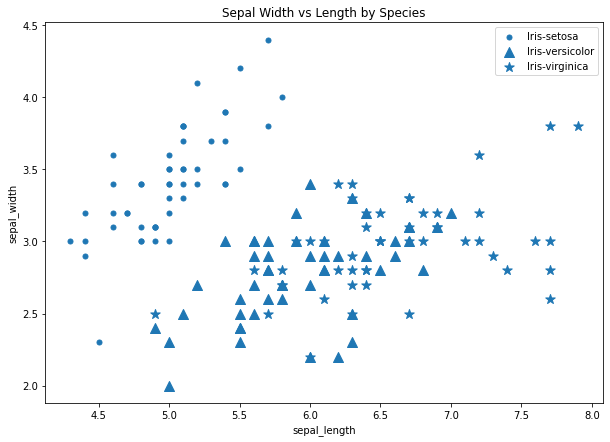

<Figure size 432x288 with 0 Axes>

In [18]:
ax = plt.axes()
for i, species in enumerate (df['class'].unique()):
    species_data = df[ df['class']==species]
    species_data.plot.scatter( x= 'sepal_length',
                               y= 'sepal_width',
                               marker = marker_shapes[i],
                               s=100,
                               title="Sepal Width vs Length by Species",
                               label= species, figsize= (10,7),ax =ax)
plt.show()
plt.clf()

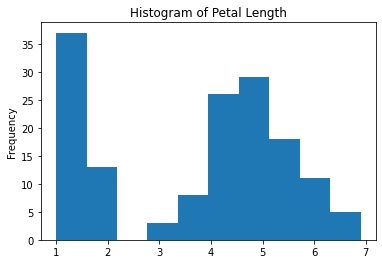

In [19]:
df['petal_length'].plot.hist(title='Histogram of Petal Length')
plt.show()

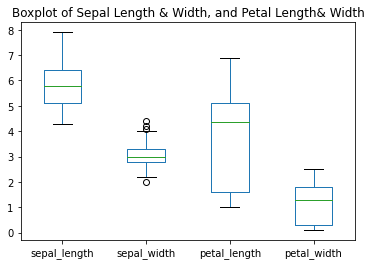

In [20]:
df.plot.box( title= 'Boxplot of Sepal Length & Width, and Petal Length& Width')
plt.show()

In [21]:
dfex= pd.DataFrame({'Day':[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})
dfex

,Day
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


***원핫 인코딩***

In [22]:
print( pd.get_dummies(dfex))

   Day_Friday  Day_Monday  ...  Day_Tuesday  Day_Wednesday
0           0           1  ...            0              0
1           0           0  ...            1              0
2           0           0  ...            0              1
3           0           0  ...            0              0
4           1           0  ...            0              0
5           0           0  ...            0              0
6           0           0  ...            0              0

[7 rows x 7 columns]


***결측값 보간***

In [24]:
import numpy as np

In [32]:
####로우 열 개 무작위
random_index = np.random.choice (df.index, replace = False, size =10)
df.loc[ random_index, ]

,sepal_length,sepal_width,petal_length,petal_width,class
143,6.8,3.2,5.9,2.3,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica
64,5.6,2.9,3.6,1.3,Iris-versicolor
8,4.4,2.9,1.4,0.2,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor


In [33]:
df.loc[random_index, 'sepal_length'] = None
df.loc[ random_index, ]

,sepal_length,sepal_width,petal_length,petal_width,class
143,NaN,3.2,5.9,2.3,Iris-virginica
79,NaN,2.6,3.5,1.0,Iris-versicolor
124,NaN,3.3,5.7,2.1,Iris-virginica
130,NaN,2.8,6.1,1.9,Iris-virginica
64,NaN,2.9,3.6,1.3,Iris-versicolor
8,NaN,2.9,1.4,0.2,Iris-setosa
70,NaN,3.2,4.8,1.8,Iris-versicolor
84,NaN,3.0,4.5,1.5,Iris-versicolor
55,NaN,2.8,4.5,1.3,Iris-versicolor
75,NaN,3.0,4.4,1.4,Iris-versicolor


In [34]:
print (df.isnull().any())

sepal_length     True
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool


In [35]:
print ("Number of rows before deleting: %d" %(df.shape[0]))
df2 = df.dropna()
print ("Number of rows after deleting: %d" %(df2.shape[0]))

Number of rows before deleting: 150
Number of rows after deleting: 140


In [36]:
df.sepal_length = df.sepal_length.fillna(df.sepal_length.mean())

In [37]:
print (df.isnull().any())

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool
